In [1]:
from face_detector_image_generator import face_detection_and_capture

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

## **Deteksi Titik Kunci pada Wajah Menggunakan Jaringan Saraf Tiruan**
---

Setelah kita belajar mendeteksi wajah menggunakan metode Viola-Jones, langkah berikutnya adalah mendeteksi titik-titik kunci pada wajah menggunakan jaringan saraf tiruan (neural network). Titik-titik kunci ini bisa mencakup posisi mata, hidung, mulut, dan sebagainya.

#### Apa Itu Deteksi Titik Kunci Wajah?

**Deteksi titik kunci wajah** adalah proses menemukan titik-titik spesifik pada wajah, seperti ujung mata, sudut bibir, atau ujung hidung. Ini lebih rumit dibandingkan deteksi objek biasa karena kita harus menemukan banyak titik pada berbagai posisi dan orientasi di wajah, bukan hanya empat sudut dari kotak pembatas.

#### Langkah-langkah dalam Deteksi Titik Kunci

1. **Deteksi Wajah**: Pertama-tama, kita harus mendeteksi wajah dalam gambar, biasanya dengan menempatkannya dalam sebuah kotak pembatas (bounding box).
  
2. **Deteksi Titik Kunci**: Setelah wajah ditemukan, kita menggunakan jaringan saraf tiruan untuk mendeteksi titik-titik kunci pada wajah tersebut. Ini berarti kita harus menemukan lebih dari 10 titik berbeda yang merepresentasikan bagian-bagian penting dari wajah.

#### Menggunakan Data untuk Pelatihan

Untuk melatih jaringan saraf tiruan agar bisa mendeteksi titik kunci dengan baik, kita memerlukan banyak data. Salah satu sumber data yang bagus adalah dari Kaggle, di mana terdapat banyak gambar wajah beserta titik-titik kuncinya. Misalnya, tantangan deteksi titik kunci wajah di Kaggle menyediakan file CSV yang berisi link ke 7.049 gambar (berukuran 96 x 96 piksel), masing-masing dengan 15 titik kunci.

#### Proses Pelatihan

Untuk melatih model deteksi titik kunci:
1. **Kumpulkan Data**: Kumpulkan gambar wajah dan tandai titik-titik kuncinya.
2. **Persiapkan Data**: Format data tersebut agar bisa digunakan oleh jaringan saraf tiruan.
3. **Latih Model**: Gunakan data tersebut untuk melatih model jaringan saraf tiruan agar dapat mendeteksi titik-titik kunci pada wajah baru.

#### Mengapa Ini Penting?

Deteksi titik kunci pada wajah sangat berguna dalam berbagai aplikasi, seperti:
- **Pengenalan Wajah**: Membantu komputer mengenali siapa orang dalam gambar.
- **Animasi Wajah**: Digunakan dalam pembuatan karakter animasi yang realistis.
- **Analisis Ekspresi Wajah**: Membantu memahami emosi seseorang dari ekspresi wajahnya.

#### Kesimpulan

Deteksi titik kunci pada wajah adalah langkah lanjutan setelah deteksi wajah yang memungkinkan kita untuk menganalisis wajah dengan lebih detail. Dengan menggunakan jaringan saraf tiruan, kita bisa mendeteksi titik-titik kunci ini secara akurat, meskipun ini adalah tugas yang lebih rumit dibandingkan deteksi objek biasa.

Semoga penjelasan ini membantu! Jika ada yang masih membingungkan atau ada yang ingin ditanyakan lebih lanjut, jangan ragu untuk bertanya.

### **Mempersiapkan Dataset untuk Deteksi Titik Kunci Wajah**
---

Untuk melatih komputer agar bisa mendeteksi titik kunci pada wajah, kita perlu mengumpulkan dan mempersiapkan dataset yang berisi banyak gambar wajah. Berikut adalah langkah-langkah untuk membuat dataset ini menggunakan webcam di komputer kamu.

### Langkah-langkah Membuat Dataset

1. **Memuat Haar Cascade Classifier**
   - Pertama, kita perlu memuat classifier Haar cascade yang akan kita gunakan untuk mendeteksi wajah. Classifier ini adalah file XML yang bisa kamu temukan di folder OpenCV kamu.
   - Contoh kode:
     ```python
     face_cascade = cv2.CascadeClassifier('path_to_haarcascade_frontalface_default.xml')
     ```

2. **Mengatur Kamera**
   - Kita menggunakan webcam untuk mengambil gambar wajah. Perintah `cv2.VideoCapture(0)` digunakan untuk mengakses kamera internal komputer. Jika kamu menggunakan kamera eksternal, gunakan `cv2.VideoCapture(1)`.
   - Contoh kode:
     ```python
     cam = cv2.VideoCapture(0)
     ```

3. **Mendeteksi Wajah dan Menampilkan di Layar**
   - Setiap frame yang dibaca dari kamera diproses untuk mendeteksi wajah menggunakan classifier yang kita muat di langkah 1. Jika wajah terdeteksi, kotak pembatas akan digambar di sekitar wajah dan hanya bagian wajah yang akan ditampilkan di layar.
   - Contoh kode:
     ```python
     while(True):
         ret, frame = cam.read()
         faces = face_cascade.detectMultiScale(frame, 1.3, 5)
         for (x, y, w, h) in faces:
             if w > 130:
                 detected_face = frame[int(y):int(y+h), int(x):int(x+w)]
                 cv2.imshow("test", detected_face)
         if not ret:
             break
         k = cv2.waitKey(1)
     ```

4. **Menyimpan Gambar**
   - Gambar wajah yang terdeteksi kemudian diubah ukurannya menjadi 299x299 piksel dan disimpan dalam folder yang sudah kamu buat (misalnya, folder `dataset`). Setiap kali kamu menekan tombol spasi, gambar akan disimpan dengan nomor file yang terus bertambah.
   - Contoh kode:
     ```python
     faceresize = cv2.resize(detected_face, (299, 299))
     img_name = "dataset/opencv_frame_{}.jpg".format(img_counter)
     cv2.imwrite(img_name, faceresize)
     ```

5. **Mengumpulkan dan Mengannotasi Gambar**
   - Ambil sekitar 100 gambar wajah dengan berbagai posisi dan orientasi. Lebih banyak gambar akan memberikan hasil deteksi yang lebih baik. Untuk anotasi (penandaan) titik kunci pada wajah, kamu bisa menggunakan alat anotasi seperti VGG annotator.
   - VGG annotator memungkinkan kamu untuk menandai titik-titik kunci seperti mata, hidung, dan bibir pada gambar. Misalnya, kamu bisa menandai 16 titik pada wajah yang mencakup mata kiri, mata kanan, hidung, bibir, dan bentuk wajah luar.

### Kesimpulan

Dengan mengikuti langkah-langkah ini, kamu bisa membuat dataset sendiri yang berisi gambar-gambar wajah dengan titik-titik kunci yang telah dianotasi. Dataset ini sangat penting untuk melatih model jaringan saraf tiruan agar bisa mendeteksi titik-titik kunci pada wajah dengan akurat. Proses ini memerlukan kerja keras dan ketelitian, tetapi hasilnya akan sangat bermanfaat untuk berbagai aplikasi seperti pengenalan wajah dan analisis ekspresi wajah.

In [2]:
face_cascade_path = './Assets/data/haarcascades/haarcascade_frontalface_default.xml'
face_detection_and_capture(face_cascade_path=face_cascade_path, output_dir='./Assets/Images/', img_size=(299, 299), alpha=0.1, offset=50)

Exiting the program.


### **Memproses Data Titik Kunci**
---

Ketika kita ingin mendeteksi titik-titik penting di wajah (seperti mata, hidung, dan mulut), kita membutuhkan data yang sudah di-annotate. Ada alat yang disebut VGG annotator yang bisa membantu kita dengan ini. Alat ini akan menghasilkan file CSV yang berisi koordinat (x, y) untuk setiap titik kunci pada setiap gambar.

#### Mengapa Ini Penting?

1. **Efisiensi**: Python kita tidak akan mencari banyak file gambar secara langsung, tetapi akan mencari data dari file CSV.
2. **Pengolahan Data**: Untuk setiap file CSV, ada 16 titik kunci yang harus diproses.
3. **Alternatif**: Ini adalah alternatif untuk menggunakan metode `ImageDataGenerator` dari Keras yang biasa digunakan untuk mengelola banyak file dalam direktori.

#### Langkah-Langkahnya

Untuk memudahkan pemahaman, kita akan membagi proses ini menjadi dua bagian:

1. **Praproses sebelum input ke dalam kode Keras-Python**
2. **Praproses dalam kode Keras-Python**

#### Praproses Sebelum Input ke Keras-Python

Sebelum kita memasukkan data ke dalam model Keras, kita perlu membersihkan dan menyiapkan data dari file CSV yang dihasilkan oleh VGG annotator. Proses ini melibatkan membaca file CSV, mengekstrak koordinat titik kunci, dan memastikan bahwa data siap untuk digunakan oleh model.

#### Praproses Dalam Kode Keras-Python

Setelah data siap, kita akan menggunakan Keras (sebuah pustaka untuk membuat dan melatih model pembelajaran mendalam) untuk memproses data lebih lanjut. Di sini, kita akan memastikan bahwa data diolah dengan benar saat dilatih oleh model.

#### Kesimpulan

Memproses data titik kunci memerlukan dua langkah utama: praproses sebelum memasukkan data ke dalam model Keras, dan praproses dalam model Keras itu sendiri. Dengan cara ini, kita memastikan bahwa data yang kita gunakan bersih, terstruktur, dan siap digunakan untuk melatih model pembelajaran mendalam yang akurat dan efisien.

In [85]:
train_path = './Assets/datasets/training.csv'
test_path = './Assets/datasets/test.csv'

# train_path = './Assets/trainimgface.csv'
# test_path = './Assets/testimgface.csv'
train_data = pd.read_csv(train_path)  
test_data = pd.read_csv(test_path)

In [86]:
train_data[:4]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...


In [87]:
test_data[:4]

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...


In [88]:
transformed_train_data=train_data.copy(deep=True)

transformed_train_data=train_data.T.reset_index().rename(columns={'index':'facial key points'})

In [89]:
transformed_train_data.iloc[[1, 2, -1]]

,facial key points,0,1,2,3,4,5,6,7,8,...,7039,7040,7041,7042,7043,7044,7045,7046,7047,7048
1,left_eye_center_y,39.002274,34.970077,34.909642,37.261774,39.621261,39.968748,34.29004,39.413452,34.7552,...,38.575634,35.671311,38.843545,35.846552,37.356855,31.842551,38.365501,36.845221,39.853666,43.42451
2,right_eye_center_x,30.227008,29.949277,30.903789,32.023096,32.24481,29.183551,29.578953,29.355961,27.47584,...,29.407912,33.952078,32.268751,28.68782,30.750926,29.746749,30.478626,31.66642,30.543285,31.096059
30,Image,238 236 237 238 240 240 239 241 241 243 240 23...,219 215 204 196 204 211 212 200 180 168 178 19...,144 142 159 180 188 188 184 180 167 132 84 59 ...,193 192 193 194 194 194 193 192 168 111 50 12 ...,147 148 160 196 215 214 216 217 219 220 206 18...,167 169 170 167 156 145 106 68 52 24 20 15 21 ...,109 109 125 141 145 139 120 81 45 34 31 35 36 ...,178 177 178 179 179 179 181 185 188 184 192 20...,164 158 118 76 66 69 59 53 43 31 35 41 45 55 6...,...,43 49 57 67 81 98 97 94 91 94 97 101 96 91 88 ...,139 140 143 141 141 140 140 139 140 141 143 14...,164 165 167 168 169 170 172 171 170 171 173 16...,254 235 191 141 106 93 94 123 168 178 178 186 ...,150 150 132 63 44 74 86 61 62 57 44 70 93 115 ...,71 74 85 105 116 128 139 150 170 187 201 209 2...,60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...,74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...,254 254 254 254 254 238 193 145 121 118 119 10...,53 62 67 76 86 91 97 105 105 106 107 108 112 1...


In [90]:
# Fungsi untuk menemukan kolom dengan NaN dan batas jumlah NaN
def find_nan_columns(df, max_display=200):
    nan_columns = {}
    for index, row in df.iterrows():
        nan_cols = row.index[row.isna()].tolist()
        if len(nan_cols) > max_display:
            nan_columns[row['facial key points']] = f"Jumlah NaN: {len(nan_cols)}"
        else:
            nan_columns[row['facial key points']] = nan_cols
    return nan_columns

max_display = 1  # Batas jumlah NaN yang akan ditampilkan
nan_columns = find_nan_columns(transformed_train_data, max_display)

# Menampilkan kolom yang bernilai NaN
for key, value in nan_columns.items():
    if isinstance(value, list):
        value_str = ' '.join(map(str, value))
    else:
        value_str = value
    print(f"{key}:\t{value_str}")

left_eye_center_x:	Jumlah NaN: 10
left_eye_center_y:	Jumlah NaN: 10
right_eye_center_x:	Jumlah NaN: 13
right_eye_center_y:	Jumlah NaN: 13
left_eye_inner_corner_x:	Jumlah NaN: 4778
left_eye_inner_corner_y:	Jumlah NaN: 4778
left_eye_outer_corner_x:	Jumlah NaN: 4782
left_eye_outer_corner_y:	Jumlah NaN: 4782
right_eye_inner_corner_x:	Jumlah NaN: 4781
right_eye_inner_corner_y:	Jumlah NaN: 4781
right_eye_outer_corner_x:	Jumlah NaN: 4781
right_eye_outer_corner_y:	Jumlah NaN: 4781
left_eyebrow_inner_end_x:	Jumlah NaN: 4779
left_eyebrow_inner_end_y:	Jumlah NaN: 4779
left_eyebrow_outer_end_x:	Jumlah NaN: 4824
left_eyebrow_outer_end_y:	Jumlah NaN: 4824
right_eyebrow_inner_end_x:	Jumlah NaN: 4779
right_eyebrow_inner_end_y:	Jumlah NaN: 4779
right_eyebrow_outer_end_x:	Jumlah NaN: 4813
right_eyebrow_outer_end_y:	Jumlah NaN: 4813
nose_tip_x:	
nose_tip_y:	
mouth_left_corner_x:	Jumlah NaN: 4780
mouth_left_corner_y:	Jumlah NaN: 4780
mouth_right_corner_x:	Jumlah NaN: 4779
mouth_right_corner_y:	Jumlah NaN:

In [91]:
train_data['nose_tip_y'].isnull().sum()

0

In [92]:
train_data.shape, test_data.shape

((7049, 31), (1783, 2))

In [93]:
image_size=len(train_data['Image'][0].split(' '))
image_size

9216

In [94]:
np.sqrt(image_size)

96.0

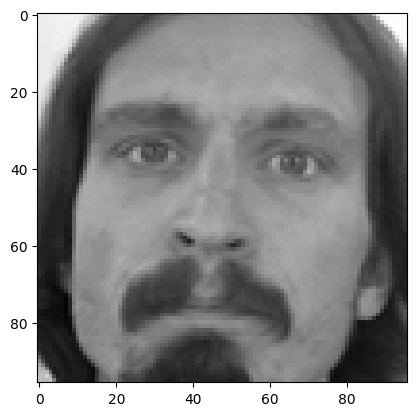

In [96]:
test_img = np.fromstring(train_data['Image'][0], sep=' ').reshape(96, 96)
plt.imshow(test_img, cmap='gray')

In [97]:
new_train_data = train_data[:100].copy(deep=True)

In [98]:
new_train_data.shape

(100, 31)

In [99]:
cvt_image_to_array = new_train_data['Image'][:100].str.split(' ')
cvt_to_numeric = cvt_image_to_array.map(lambda x: pd.to_numeric(x))

In [100]:
new_train_data['Image'] = cvt_to_numeric

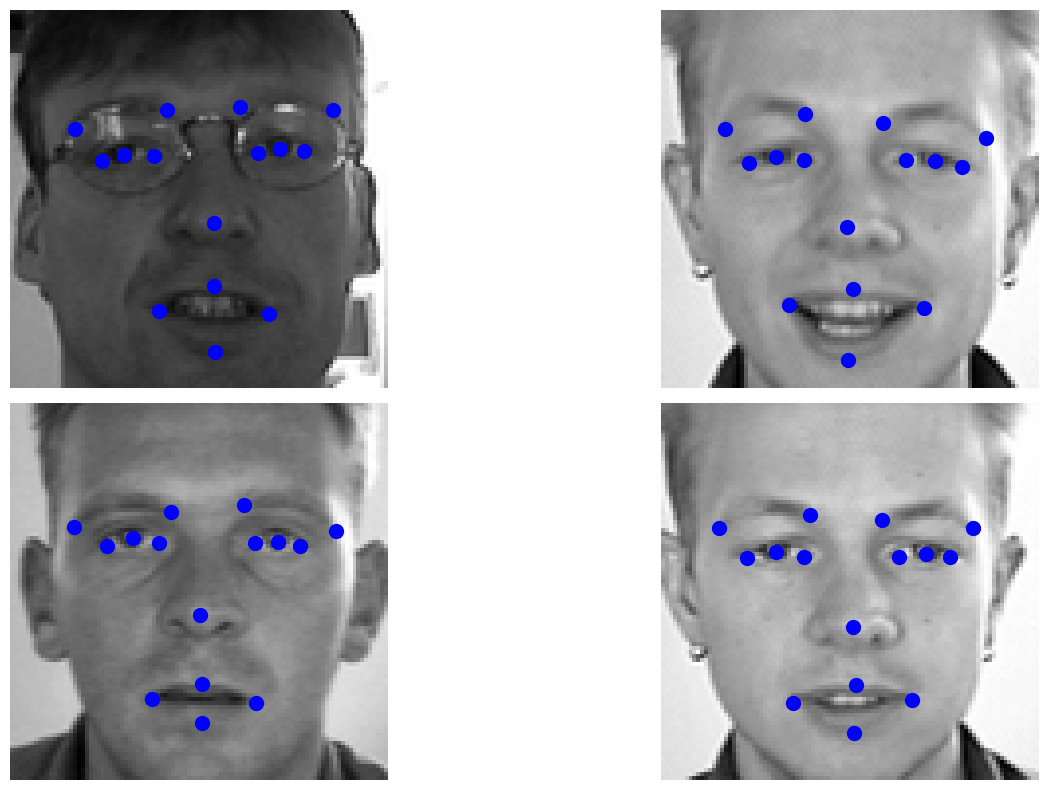

In [104]:
import math
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan beberapa gambar dengan facial key points dalam satu figure
def show_multiple_images_with_keypoints(
        dataframe, 
        keypoints_columns,
        image_column, 
        parent_path=None,
        num_images=5, 
        figsize_per_image=(8, 4), 
        image_size=(96, 96),
        scatter_size=400,
        scatter_color='blue'
    ):
    # Calculate the number of rows and columns needed
    num_columns = math.ceil(math.sqrt(num_images))
    num_rows = math.ceil(num_images / num_columns)
    figsize = (num_columns * figsize_per_image[0], num_rows * figsize_per_image[1])

    # Membuat plot
    plt.figure(figsize=figsize)
    
    # Memilih index secara acak untuk menampilkan gambar
    indices = np.random.choice(len(dataframe), num_images, replace=False)
    
    for i, index in enumerate(indices):
        # Mendapatkan data gambar dari kolom
        image_data = dataframe[image_column][index]
        img_exts = ['jpg', 'jpeg', 'png', 'tiff', 'bmp', 'gif', 'heif', 'raw', 'webp', 'svg', 'psd', 'ico', 'pdf']

        # Mengecek apakah data gambar adalah path ke file gambar atau string data gambar
        if isinstance(image_data, str) and any(image_data.endswith(ext) for ext in img_exts):
            # Jika path ke file gambar
            image = cv2.imread(parent_path + image_data, cv2.IMREAD_GRAYSCALE)
        elif isinstance(image_data, str):
            # Jika string data gambar
            image = np.fromstring(image_data, sep=' ').astype(np.float32)
            image = image.reshape(image_size[0], image_size[1])
        else:
            # Jika data gambar berupa array angka
            image = np.array(image_data).astype(np.float32)
            image = image.reshape(image_size[0], image_size[1])
        
        # Menampilkan gambar pada subplot
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(image, cmap='gray')
        
        # Membuat dictionary key points
        keypoints = {
            key: (dataframe.loc[index, key], dataframe.loc[index, key.replace('x', 'y')])
            for key in keypoints_columns if 'x' in key
        }

        # Menambahkan titik key points pada gambar
        for key, (x, y) in keypoints.items():
            plt.scatter(x, y, s=scatter_size, marker='.', c=scatter_color)
        
        # Menghilangkan axis
        plt.axis('off')
    
    # Menampilkan figure
    plt.tight_layout()
    plt.show()

# Memuat dataset
keypoints_columns = new_train_data.columns[:-1]

# Menampilkan beberapa gambar beserta facial key points
show_multiple_images_with_keypoints(
    new_train_data, 
    image_column='Image',
    # parent_path='./Assets/Images/',
    keypoints_columns=keypoints_columns, 
    num_images=4, 
    image_size=(96, 96)
)